# Image File Read

### OpenCV

In [1]:
# import OpenCV, your code here
import cv2

img_cv2 = cv2.imread('OIP.jpg')

print(type(img_cv2))

<class 'numpy.ndarray'>


In [2]:
# print shape and data type of the image, your code here
print(img_cv2.shape ,img_cv2.dtype)

(296, 474, 3) uint8


In [3]:
cv2.imshow('image',img_cv2)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('OIP_1.png',img)
    cv2.destroyAllWindows()

### matplotlib

In [4]:
import matplotlib.pyplot as plt

# matplotlib image to read file
img = plt.imread(r"OIP.jpg")  

# print type, shape and data type of the image, your code here
print(type(img),img.shape,img.dtype)

<class 'numpy.ndarray'> (296, 474, 3) uint8


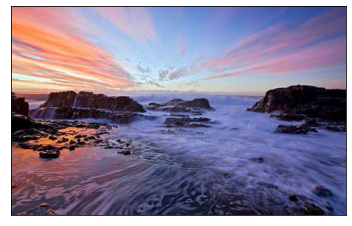

In [5]:
# show the image
plt.imshow(img)
# to hide tick values on X and Y axis
plt.xticks([]), plt.yticks([])  
plt.show()

Use matplotlib to show cv2 opened image

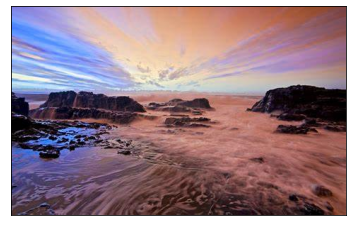

In [6]:
plt.imshow(img_cv2)
plt.xticks([]), plt.yticks([]) 
plt.show()

The reason of the difference of above two images: OpenCV is BGR, Matplotlib is RGB

Convert BGR to RGB

<class 'numpy.ndarray'> (296, 474, 3)


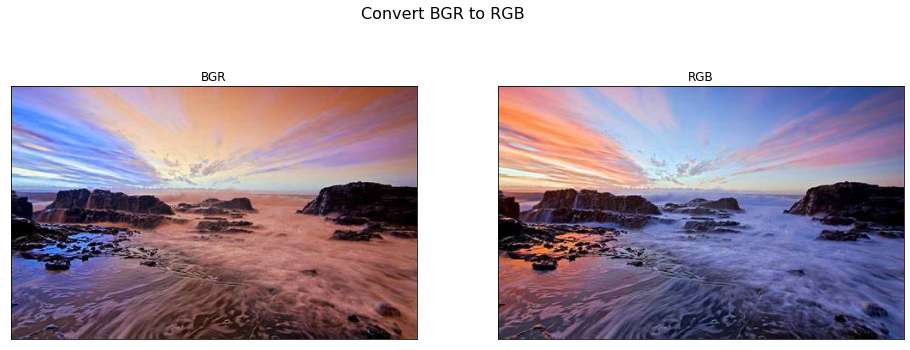

In [7]:
import numpy as np
import cv2

img_cv2 = cv2.imread('OIP.jpg')
print(type(img_cv2),img_cv2.shape)

# convert, your code here 
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Convert BGR to RGB', fontsize=16)

ax1.set_title('BGR')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.imshow(img_cv2)

ax2.set_title('RGB')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.imshow(img_rgb)

plt.show()

### skimage

<class 'numpy.ndarray'> (296, 474, 3) uint8


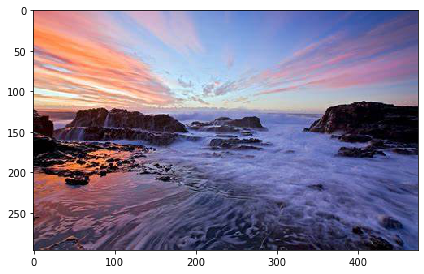

In [8]:
from skimage import io, color
img = io.imread('OIP.jpg')
print(type(img),img.shape,img.dtype)
io.imshow(img)
io.show()

### Pillow

In [9]:
# import pillow
from PIL import Image
import numpy as np

im = Image.open("OIP.jpg")
# If successful, this function returns an Image object. 

print(im.format, im.size, im.mode,type(im))
# The format attribute identifies the source of an image. 
# The size attribute is a 2-tuple containing width and height (in pixels). 
# The mode attribute defines the number and names of the bands in the image, and also the pixel type and depth. 
# Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images.
im.show()

JPEG (474, 296) RGB <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [10]:
im_array = np.array(im)
print(type(im_array),im_array.shape,im_array.dtype)

<class 'numpy.ndarray'> (296, 474, 3) uint8


## Resize

### Use OpenCV

uint8 (296, 474, 3)
uint8 (88, 142, 3)


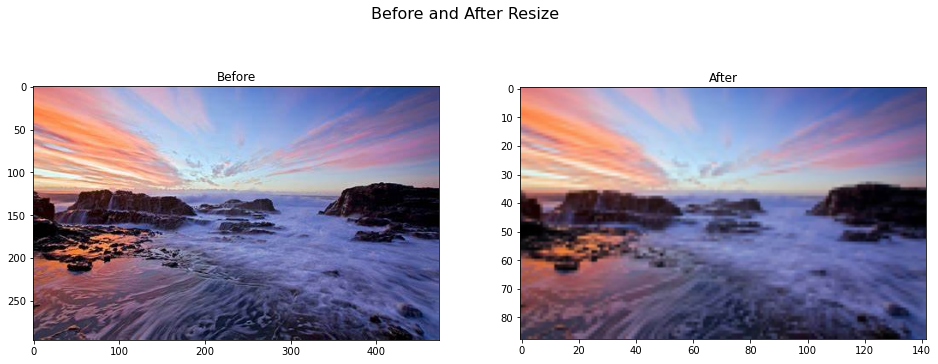

In [11]:
scale_percent = 30
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image, your code here
resized = cv2.resize(img_rgb, dim , interpolation = cv2.INTER_AREA)

print(img_rgb.dtype,img_rgb.shape)
print(resized.dtype,resized.shape)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Before and After Resize', fontsize=16)
ax1.set_title('Before')
ax1.imshow(img_rgb)
ax2.set_title('After')
ax2.imshow(resized)
plt.show()

### Use skimage

uint8 (296, 474, 3)
float64 (59, 94, 3)


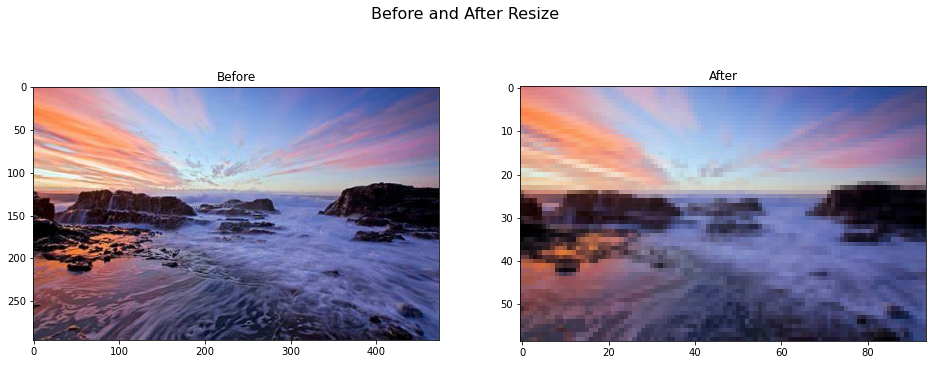

In [12]:
from skimage.transform import resize
scale_percent = 20
width = int(img_rgb.shape[1] * scale_percent / 100)
height = int(img_rgb.shape[0] * scale_percent / 100)

img = io.imread('OIP.jpg')
dim = (height,width, 3)
img_skirsz = resize(img,dim)
print(img_rgb.dtype,img_rgb.shape)
print(img_skirsz.dtype,img_skirsz.shape)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Before and After Resize', fontsize=16)
ax1.set_title('Before')
ax1.imshow(img_rgb)
ax2.set_title('After')
ax2.imshow(img_skirsz)
plt.show()

### Use Pillow

In [13]:
from PIL import Image
im = Image.open("OIP.jpg")
img_PIL_rsz = im.resize((64,64))

In [14]:
print(img_PIL_rsz.size, img_PIL_rsz.mode)

(64, 64) RGB


In [15]:
img_PIL_rsz.show() # Use default image application to show

### Change image type from float to unit8

In [16]:
img = io.imread('OIP.jpg')
img_skirsz = resize(img,(59,94,3))

# your code here
img_skirsz_uint8 = img_skirsz * 255 
img_skirsz_uint8 = img_skirsz_uint8.astype(np.uint8)

print(img_skirsz.dtype, img_skirsz_uint8.dtype)

float64 uint8


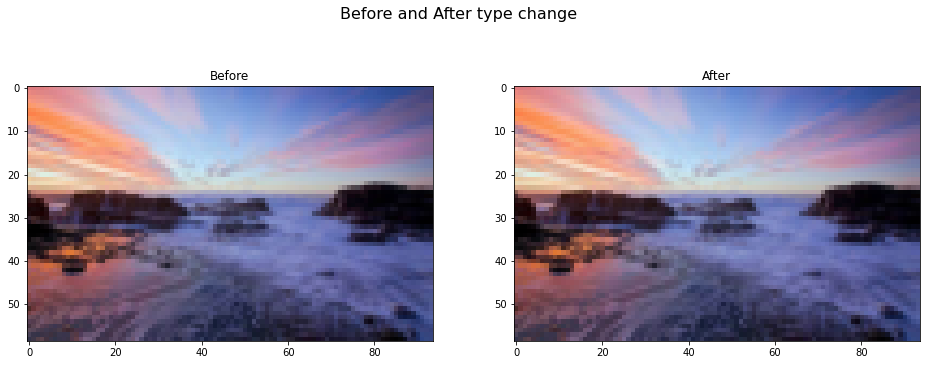

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
fig.suptitle('Before and After type change', fontsize=16)
ax1.set_title('Before')
ax1.imshow(img_skirsz)
ax2.set_title('After')
ax2.imshow(img_skirsz_uint8)
plt.show()

## Crop image

OpenCV

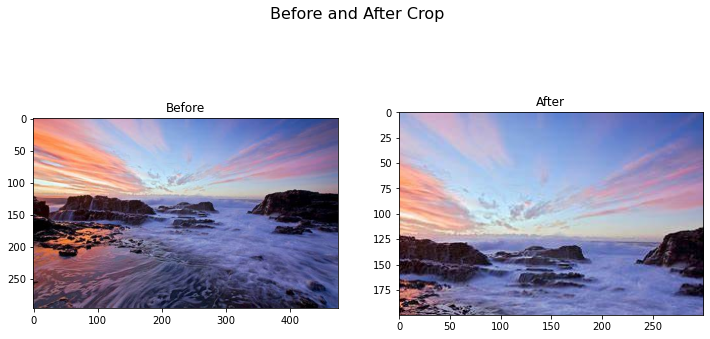

In [18]:
# set image from row 0 - 200, col 100 - 400
x=0
w=200
y=100
h=400
crop_image = img_rgb[x:w, y:h]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Before and After Crop', fontsize=16)

ax1.set_title('Before')
ax1.imshow(img_rgb)

ax2.set_title('After')
ax2.imshow(crop_image)
plt.show()

Pillow

In [19]:
im = Image.open("OIP.jpg")
left = 0
top = 50
right = 200
bottom = 250
img_res = im.crop((left, top, right, bottom))  
img_res.show() 